#### Final Project: Rick & Morty analysis

# Phase 3: Exploring Data

In [1]:
# imports
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt

## Download previous files

In [2]:
df_characters = pd.read_csv("RaM_characters_wRelations.csv")

In [59]:
df_episodes = pd.read_csv("RaM_episodes.csv")

In [3]:
def add_node(row, aGraph):
    """ Add the node given in row to global network """
    aGraph.add_node(row.Name)

def add_edges(row, aGraph):
    """ Add all edges which concern given character in row"""
    char_name = row.Name
    char_relations = ast.literal_eval(row.Relations)
    for aTargetRelation in char_relations:
        aGraph.add_edge(char_name,aTargetRelation)

In [4]:
# Create the associate graph with all attributes : role, race, genre, contentLength
G = nx.DiGraph()
_ = df_characters.apply(add_node, args=(G,), axis=1)
_ = df_characters.apply(add_edges, args=(G,), axis=1)

# Extract the Giant Connected Component, GCC
GCC = nx.weakly_connected_components(G)
GCC = list(GCC)
GCC.sort(key=len)
concerned_nodes = GCC[-1]

GCC = G.subgraph(concerned_nodes).copy()

# make G undirected
GU = G.to_undirected()

### Community Detection
https://networkx.org/documentation/stable/reference/algorithms/community.html 

In [5]:
import community

In [20]:
def get_partition(attribute, aGraph):
    """ Return a partition of aGraph based on given attribute as a dictionary of community subgraphs """
    nodes_attributes_dic = {k:v[attribute] for k,v in dict(G.nodes(data=True)).items()}
    return get_partition_from_nodes_attributes(nodes_attributes_dic, aGraph)

def get_partition_from_nodes_attributes(nodes_attributes_dic, aGraph):
    communities_list = list(set(list(nodes_attributes_dic.values())))
    community_partition = { aCommunity:None for aCommunity in communities_list }
    for aCommunity in communities_list:
        community_characters_list = [ k for k,v in nodes_attributes_dic.items() if v == aCommunity ]
        community_subgraph = aGraph.subgraph(community_characters_list).copy()
        community_partition[aCommunity] = community_subgraph
    return community_partition

def get_modularity(communities_dic, aGraph):
    """ Get the modularity M of the partition of a graph aGraph given through the dictionary of subgraphs communities_dic """
    L = aGraph.number_of_edges()
    M = 0
    for _, aCommunityGraph in communities_dic.items():
        Lc = aCommunityGraph.number_of_edges()
        kc = sum(list(dict(aCommunityGraph.degree).values()))
        M += (Lc/L - (kc/(2*L))**2)
    print("Modularity M = {}".format(round(M, 2)))
    return M

In [58]:
list(nx.algorithms.community.centrality.girvan_newman(GU))

[({'Abandoned Jerrys',
   'Abrodolph Lincoler',
   'Adjudicator Rick',
   'Afro Rick',
   'Agent Gribbles',
   'Alan Rails',
   'Albert Einstein',
   'Alexander',
   'Alien Googah',
   'Alien Morty',
   'Alien Rick',
   'Alyson Hannigan',
   'Amfiddians',
   'Amish Cyborg',
   'Annie',
   'Antenna Morty',
   'Antenna Rick',
   'Aqua Morty',
   'Aqua Rick',
   'Arcade Alien',
   'Arm Head Mutant Morty',
   'Armagheadon',
   'Armothy',
   'Arthricia',
   'Artist Morty',
   'Baby Poopybutthole',
   'Baby Wizard',
   'Balthromaw',
   'Bearded Lady',
   'Beebo',
   'Benjamin',
   'Bepisians',
   'Beta-Seven',
   'Beth Sanchez (C-137)',
   'Beth Sanchez (C-500A)',
   "Beth Sanchez (Simple Rick's Dimension)",
   'Beth Smith',
   'Beth Smith (304-X)',
   'Beth Smith (C-132)',
   "Beth Smith (Evil Rick's Target Dimension)",
   "Beth's Mytholog",
   'Big Boobed Waitress',
   'Big Fat Rick',
   'Big Morty',
   "Big Morty's Bodyguard Mortys",
   'Big-Head Morty',
   'Bill (Dog)',
   'Birdperson',


In [34]:
best_partition = community.best_partition(GU)

# For best partition 'Louvain-algorithm' from community (networkx)
print("Partition based best partition with Louvain-algorithm:")
best_partition_subgraphs = get_partition_from_nodes_attributes(best_partition, G)
best_partition_modularity = get_modularity(best_partition_subgraphs, G)
print("Number of communities found: {}".format(len(best_partition_subgraphs)))

Partition based best partition with Louvain-algorithm:
Modularity M = 0.6
Number of communities found: 69


In [40]:
best_partition_char_lists = {k:list(aSubGraph.nodes()) for k,aSubGraph in best_partition_subgraphs.items()}
best_partition_char_lists = dict(sorted(best_partition_char_lists.items(), reverse=True, key=lambda x:len(x[1])))

In [41]:
best_partition_char_lists

{7: ['Blue Footprint Guy',
  'Kathy Ireland',
  'Japheth',
  'Taddy Mason',
  'Morty Smith',
  'Butter Robot',
  'Artist Morty',
  'Michael Denny and the Denny Singers',
  'Xing Ho',
  'Mr. Booby Buyer',
  'Voltamatron',
  'Brad Anderson',
  'Diseases',
  'Diesel Weasel',
  'Armothy',
  'Rick Sanchez (K-22)',
  'Truth Tortoise',
  'Solicitor Rick',
  'Katherine Heffelfinger',
  'Bova',
  'Jodie',
  'Dave',
  'Gobo',
  'Colossus',
  'Purge Planet Ruler',
  'Dale',
  'Lord Henderfinger',
  'Drippy Boy',
  'Morty Smith (K-22)',
  'Coach Feratu',
  'Long Sleeved Morty',
  'General Store Owner',
  'Planetina',
  'Crystallized Morty',
  'Tina-Teers',
  'Alexander',
  "Morty's Girlfriend",
  'Jaguar',
  'Hammerhead Morty (Fortnite)',
  'Arthricia',
  'Roy',
  'Heroin Keith',
  'Phillip Jacobs',
  'Blazen',
  'Cyclops Rick',
  'Annie',
  'Aqua Morty',
  'Doofus Rick',
  'Cyclops Morty',
  'Hoovy',
  'Trunk People',
  'Rick Sanchez (J19α7)',
  'Aqua Rick',
  'Dipper and Mabel Mortys',
  'Concer

In [24]:
import fa2
import matplotlib.cm as cm

In [25]:
# node color list
node_color_list = [cm.get_cmap("tab20")(best_partition[node]) for node in list(G.nodes())]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.42it/s]


BarnesHut Approximation  took  1.36  seconds
Repulsion forces  took  10.99  seconds
Gravitational forces  took  0.07  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.19  seconds


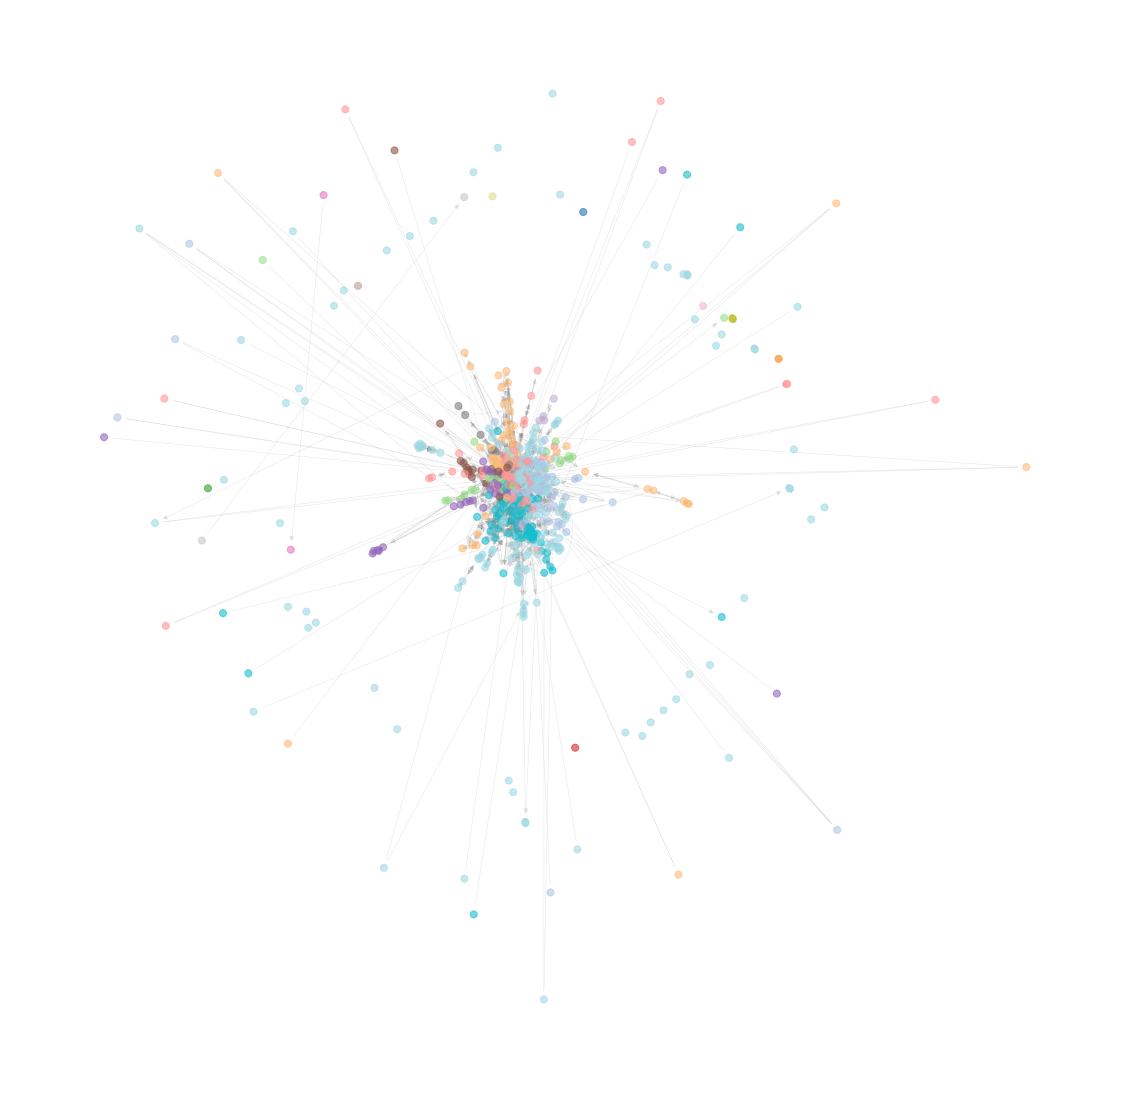

In [12]:
forceatlas2 = fa2.ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1,

                        # Log
                        verbose=True)

pos = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)

fig, ax = plt.subplots(figsize=(20,20))

nx.draw_networkx_nodes(G,pos=pos, node_color=node_color_list, node_size=50, alpha=0.6)
nx.draw_networkx_edges(G,pos=pos, edge_color = 'gray', width=0.5, alpha=0.2)

plt.axis('off')
plt.show()

## Plot log-log degreee distributions + compare with BA and WS

In [1]:
import seaborn as sns
sns.set()